# **Topic 7 8 - Python for Data Analysis: Visualisation Data**

# 1. Import Libraries & Data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df0 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/train.csv')

# 2. Penjelasan Data

In [ ]:
df0.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df0.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Berdasarkan output data dapat diketahui bahwa yang merupakan 
1. Data categorical adalah variabel: Survived, Pclass, Sex, dan Embarked
2. Data numerical adalah variabel: Age, SibSp, Parch, dan Fare

Keterangan Variabel
1. Passengerid : Id penumpang
2. Survived : Kondisi keselamatan penumpang (1=Survived, 0=Not survived)
3. Pclass : Kelas/ golongan tiket penumpang (1=Upper, 2=Middle, 3=Lower)
4. Name : Nama penumpang
5. Sex : Jenis kelamin penumpang (male dan female)
6. Age : Umur penumpang
7. SibSp : Siblings/ keterangan bahwa penumpang mempunyai saudara di kapal (1=Memiliki saudara di kapal, 0 =Tidak memiliki saudara di kapal)
8. Parch : Parents or children/ keterangan bahwa penumpang mempunyai orang tua atau anak di kapal (1=Memiliki orangtua/ anak-anak di kapal, 0 = Tidak memiliki orangtua/ anak-anak di kapal)
9. Ticket : Nomor tiket penumpang
10. Fare : Tarif tiket penumpang
11. Cabin : No kabin penumpang
12. Embarked : Asal penumpang ( C=Cherbourg, Q=Queenstown, S=Southampton)

# 3. Variabel Target 

Target variabel pada permasalahan dataset ini adalah Variabel Survived. Di mana visualisasi yang dilakukan ditujukan untuk mengetahui berbagai informasi yang berkaitan dengan variabel Survived mulai dari jumlah penumpang yang selamat dan tidak selamat, distribusi penumpang selamat/tidak selamat berdasarkan kategori - kategori tertentu, hingga variabel - variabel yang mempengaruhi tingkat keselamatan penumpang.

# 4. Data Cleansing

Sebelum melakukan visualisasi data, terlebih dahulu dilakukan Data Cleansing untuk mengatasi permasalahan-permasalahan data yang ada sehingga tiak menghambat proses visualisasi nantinya.

## 4.1. Missing Value 

**a. Identifikasi ada/tidaknya Missing Value**

In [ ]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df0.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Berdasarkan output terlihat bahwa terdapat missing value pada variabel Age sejumlah 177, pada variabel Cabin sejumlah 687, dan pada variabel Embarked sejumlah 2. Maka perlu dilakukan Missing Value Handling untuk mencegah terganggunya analisis karena missing value.


---



**b. Missing Value Handling Variabel Age**

Missing Value Handling pada variabel Age menggunakan *metode pengisian dengan nilai median* hal tersebut karena jumlah missing value dapat dikatakan banyak sehingga apabila melakukan penghapusan baris akan mempengaruhi hasil analisis.

In [ ]:
df['Age'] = df0['Age'].fillna(df['Age'].median())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Berdasarkan output diketahui bahwa sudah tidak terdapat Missing Value pada Variael Age.

---



**c. Missing Value Handling Variabel Cabin**

Missing Value Handling pada Variabel Cabin dilakkukan dengan menghapus kolom Cabin. Hal tersebut dikarenakan jumlah Missing Value pada variabel Cabin sangat banyak. Selain itu, variabel Cabin bukan merupakan target variabel pada visualisasi data yang akan dilakukan sehingga tidak menjadi masalah besar apabila data variabel tersebut dihilangkan.

In [ ]:
df = df.drop('Cabin', axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


Berdasarkan output di atas terlihat sudah tidak terdapat variael Cabin pada dataset.

---



**d. Missing Value Handling Variabel Embarked**

Missing Value Handling Variabel Embarked dilakukan dengan menggunakan *metode pengisian dengan nilai Modus*. Hal tersebut bertujuan supaya tidak menghilangkan informasi nilai data pada baris yang memiliki missing value. Serta, karena tipe data variabel EMbarked adalah Object maka dilakukan pengisian menggunakan nilai Modus

In [ ]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


Berdasarkan output di atas terlihat bahwa sudah tidak terdapat Missing Value pada Variabel Embarked.

## 4.2. Categorical Data Encoding

**a. Identifikasi Type Data**

In [ ]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


Berdasarkan output di atas terlihat bahwa terdapat Variabel Data bertipe Non-Numerik yang memiliki nilai data kategori yaitu Variabel Sex dan Variabel Embarked. Oleh karena itu perlu dilakukan Categorical Data Encoding untuk merubahnya ke dalam bentuk data numerik sehingga memudahkan dalam proses analisis nantinya.

---



**b. Encoding Variabel Sex & Variabel Embarked**

Encoding dilakukan dengan menggunakan *metode frequently encoding*. Hal tersebut karena terdapat variabel data yang memiliki lebih dari 2 nilai kategori yaitu Embarked sehingga supaya dihasilkan ukuran data nominal dan tidak menghasilkan banyak kolom, dilakukan frequently encoding.

In [ ]:
freq_et = df['Sex'].value_counts().reset_index()
freq_et.rename(columns={"index": "Sex", "Sex": "freq_Sex"}, inplace = True)
freq_et['pct_Sex'] = round((freq_et['freq_Sex']/freq_et['freq_Sex'].sum())*100,2)
df = df.merge(freq_et[['Sex','pct_Sex']], on='Sex', how='inner')

freq_et = df['Embarked'].value_counts().reset_index()
freq_et.rename(columns={"index": "Embarked", "Embarked": "freq_Embarked"}, inplace = True)
freq_et['pct_Embarked'] = round((freq_et['freq_Embarked']/freq_et['freq_Embarked'].sum())*100,2)
df = df.merge(freq_et[['Embarked','pct_Embarked']], on='Embarked', how='inner')

df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,pct_Sex,pct_Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,64.76,72.50
1,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,64.76,72.50
2,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S,64.76,72.50
3,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S,64.76,72.50
4,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,S,64.76,72.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,859,1,3,"Baclini, Mrs. Solomon (Latifa Qurban)",female,24.0,0,3,2666,19.2583,C,35.24,18.86
887,867,1,2,"Duran y More, Miss. Asuncion",female,27.0,1,0,SC/PARIS 2149,13.8583,C,35.24,18.86
888,875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.0,1,0,P/PP 3381,24.0000,C,35.24,18.86
889,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,C,35.24,18.86


## 4.3. Outliers Handling

**a. Identifikasi Outlier**

Variabel yang memungkinkan adanya outliers adalah variabel yang memiliki tipe data numerik dengan ukuran data minimal berskala interval yaitu Variabel Age, SibSp, Parch, dan Fare.

Text(0.5, 0, '')

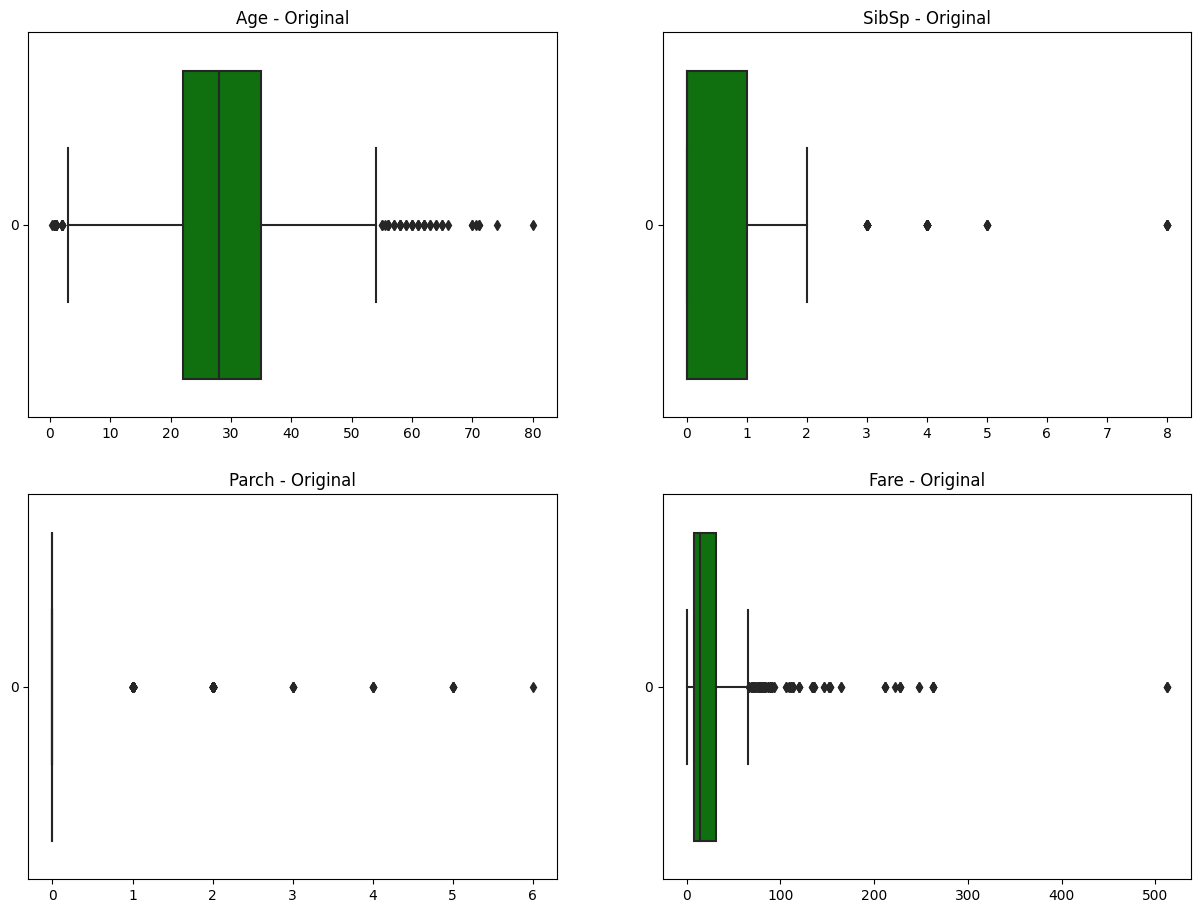

In [ ]:
f,ax = plt.subplots(2,2,figsize=(15,11))

g = sns.boxplot(df['Age'],color='green',orient='h', ax=ax[0,0])
ax[0,0].set_title('Age - Original')
ax[0,0].set_xlabel('')

g = sns.boxplot(df['SibSp'],color='green',orient='h', ax=ax[0,1])
ax[0,1].set_title('SibSp - Original')
ax[0,1].set_xlabel('')

g = sns.boxplot(df['Parch'],color='green',orient='h', ax=ax[1,0])
ax[1,0].set_title('Parch - Original')
ax[1,0].set_xlabel('')

g = sns.boxplot(df['Fare'],color='green',orient='h', ax=ax[1,1])
ax[1,1].set_title('Fare - Original')
ax[1,1].set_xlabel('')

Berdasarkan output di atas terlihat bahwa keempat variabel data memiliki cukup banyak outlier. Sehingga perlu dilakukan Outlier Handling supaya visualisasi yang dilakukan menghasilkaan informasi yang lebih tepat.

---



**b. Outlier Handling**

Outlier Handling dilakukan dengan menggunakan *metode log transformasi* supaya menghasilkan hasil handling yang maksimal.

Text(0.5, 0, '')

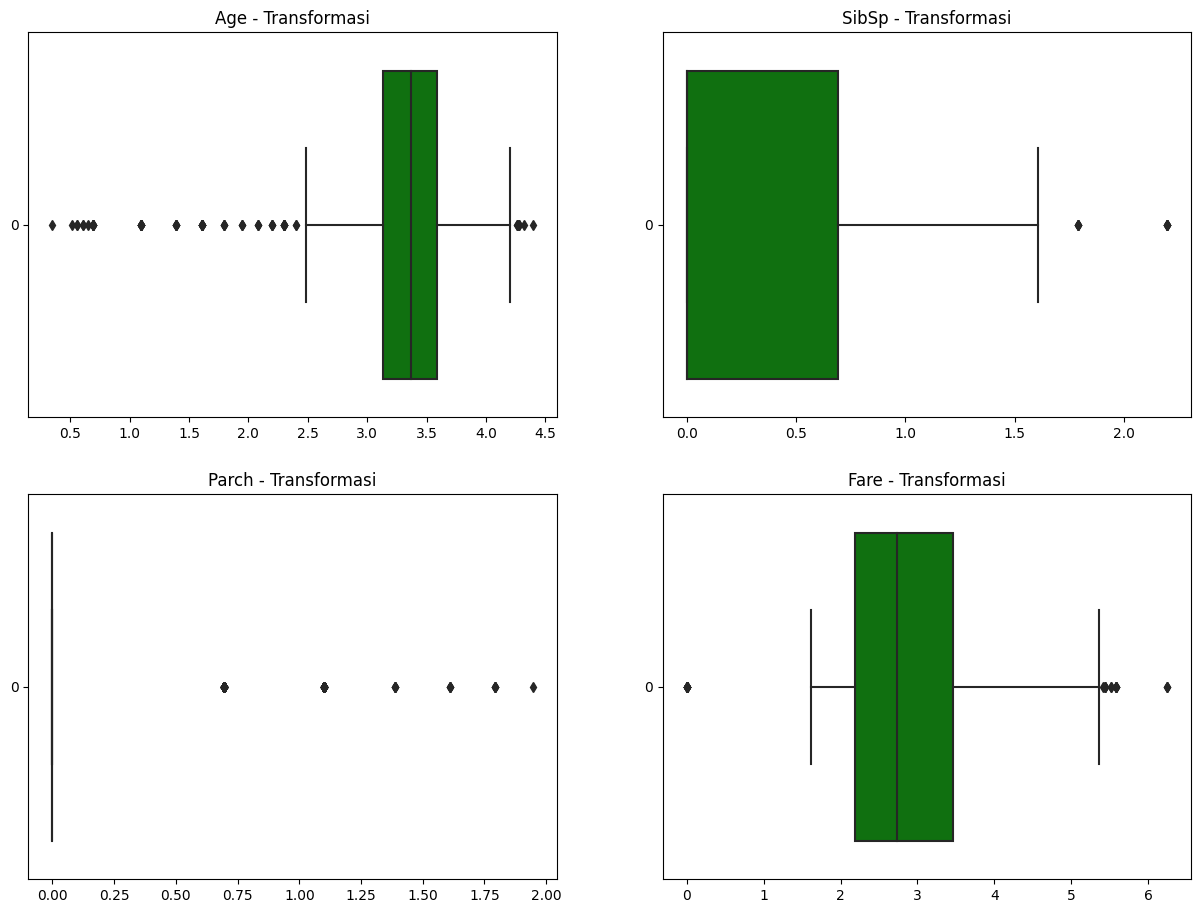

In [ ]:
f,ax = plt.subplots(2,2,figsize=(15,11))

g = sns.boxplot(np.log(df['Age']+1),color='green',orient='h', ax=ax[0,0])
ax[0,0].set_title('Age - Transformasi')
ax[0,0].set_xlabel('')

g = sns.boxplot(np.log(df['SibSp']+1),color='green',orient='h', ax=ax[0,1])
ax[0,1].set_title('SibSp - Transformasi')
ax[0,1].set_xlabel('')

g = sns.boxplot(np.log(df['Parch']+1),color='green',orient='h', ax=ax[1,0])
ax[1,0].set_title('Parch - Transformasi')
ax[1,1].set_xlabel('')

g = sns.boxplot(np.log(df['Fare']+1),color='green',orient='h', ax=ax[1,1])
ax[1,1].set_title('Fare - Transformasi')
ax[1,1].set_xlabel('')

Berasarkan output terlihat bahwa Outliers Handling tidak menghasilkan perubahan yang signifikan dari data sebelum Outlier Handling.

## 4.4. Hasil Cleansing

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   891 non-null    int64  
 1   Survived      891 non-null    int64  
 2   Pclass        891 non-null    int64  
 3   Name          891 non-null    object 
 4   Sex           891 non-null    object 
 5   Age           891 non-null    float64
 6   SibSp         891 non-null    int64  
 7   Parch         891 non-null    int64  
 8   Ticket        891 non-null    object 
 9   Fare          891 non-null    float64
 10  Embarked      891 non-null    object 
 11  pct_Sex       891 non-null    float64
 12  pct_Embarked  891 non-null    float64
dtypes: float64(4), int64(5), object(4)
memory usage: 129.7+ KB


In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,pct_Sex,pct_Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208,54.356768,56.867295
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429,14.110267,25.520376
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,35.240000,8.640000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,35.240000,18.860000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,64.760000,72.500000
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,64.760000,72.500000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,64.760000,72.500000


# 5. Barplot

Barplot atau Bar Chart merupakan salah satu visualisasi data yang umumnya digunakan untuk menunjukkan perbandingan nilai data/value antar variabel kategori yang berbeda (bersakala nominal/ordinal) atau digunakan untuk menunjukkan perandingan nilai data antara variabel kategori dengan variabel numerik bersakala interval.

## 5.1. Variabel Survived


Mengetahui perbandingan jumlah penumpang yang selamat dengan jumlah penumpang yang tidak selamat

<Axes: xlabel='Survived', ylabel='count'>

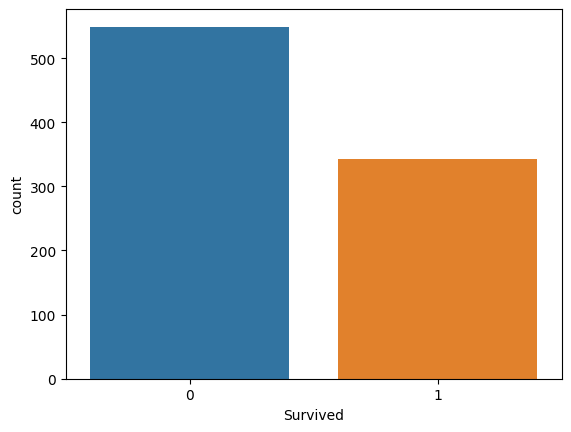

In [ ]:
# Vertikal
sns.countplot(data=df,x="Survived")

<Axes: xlabel='count', ylabel='Survived'>

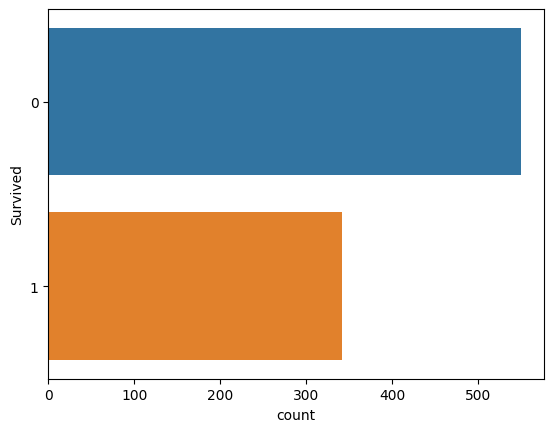

In [ ]:
# Horizontal
sns.countplot(data=df,y="Survived")

Dengan diketahui bahwa: 0= Not Survived; 1 = Survived

Berdasarkan output Barplot di atas diketahui bahwa jumlah penumpang yang tidak selamat lebih banyak daripada jumlah penumpang yang selamat.

## 5.2. Variabel Pclass

### a. Mengetahui perbandingan jumlah penumpang berdasarkan golongan kelas tiket penumpang

<Axes: xlabel='Pclass', ylabel='count'>

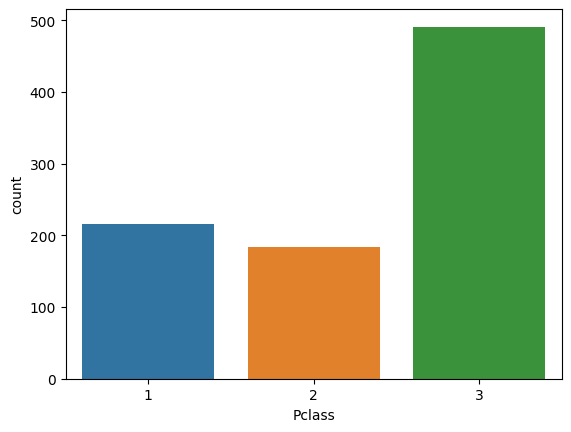

In [ ]:
# Vertikal 
sns.countplot(data=df,x="Pclass")

<Axes: xlabel='count', ylabel='Pclass'>

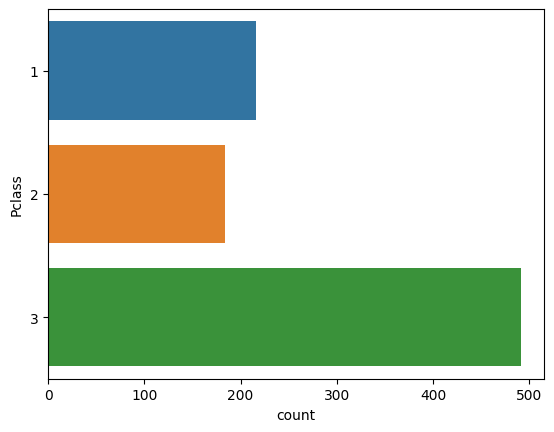

In [ ]:
# Horizontal
sns.countplot(data=df,y="Pclass")

Dengan diketahui bahwa: 1=Upper; 2=Middle; 3=Lower

Berdasarkan output Barplot di atas dapat diketahui bahwa jumlah penumpang paling banyak adalah penumpang golongan kelas 3. Semenntara, jumlah penumpang yang paling sedikit adalah penumpang golongan kelas 2.

### b. Mengetahui perbandingan jumlah penumpang yang survived/ not survived berdasarkan golongan kelas tiket

<Axes: xlabel='Pclass', ylabel='Survived'>

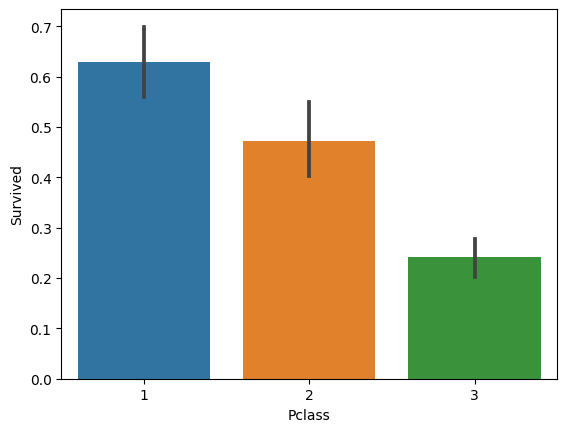

In [ ]:
sns.barplot(data=df, x='Pclass', y='Survived')

Berdasarkan output Barplot di atas dapat diketahui bahwa penumpang golongan kelas 1 memiliki tingkat keselamatan paling tinggi yaitu lebih dari 0,6. Sementara penumpang golongan kelas 3 memiliki tingkat keselamatan paling rendah yaitu kurang dari 0,3.

<Axes: xlabel='Pclass', ylabel='count'>

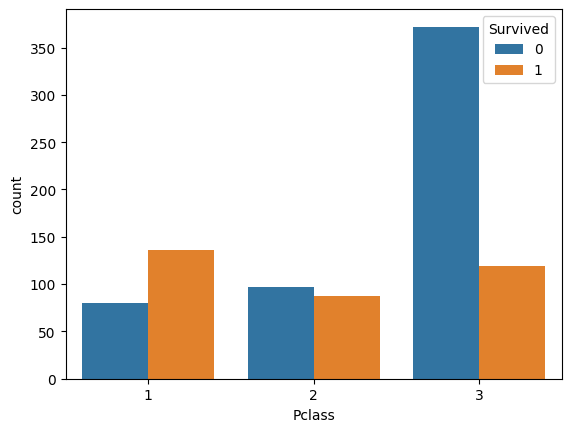

In [ ]:
# Vertikal 
sns.countplot(data=df, x='Pclass', hue='Survived')

<Axes: xlabel='count', ylabel='Pclass'>

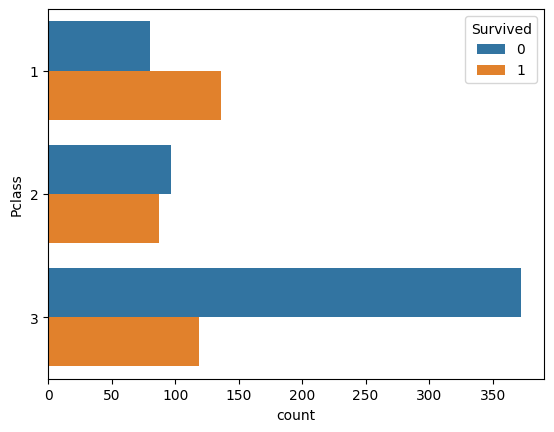

In [ ]:
# Horizontal
sns.countplot(data=df, y='Pclass', hue='Survived')

Berdasarkan output Barplot di atas diketahui bahwa 
1. Mayoritas penumpang golongan kelas 1 selamat
2. Mayoritas penumpang golongan kelas 2 tidak selamat 
3. Mayoritas penumpang golongan kelas 3 tidak selamat
4. Jumlah penumpang yang selamat lebih banyak berasal dari penumpang golongan kelas 1
5. Jumlah penumpang yang tidak selamat paling banyak dari golongan kelas 3

## 5.3. Variabel Sex


### a. Mengetahui perbandingan jumlah penumpang berdasarkan jenis kelamin

<Axes: xlabel='Sex', ylabel='count'>

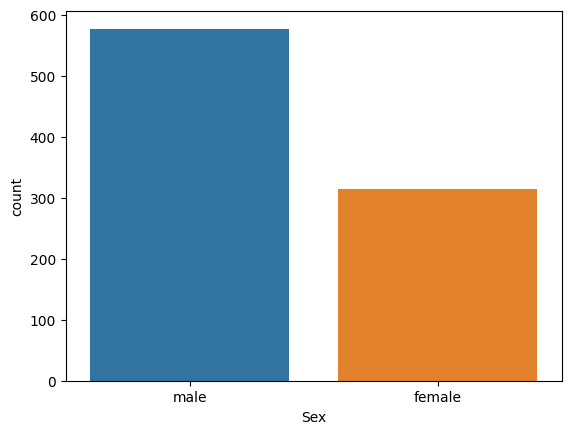

In [ ]:
# Vertikal
sns.countplot(data=df,x="Sex")

<Axes: xlabel='count', ylabel='Sex'>

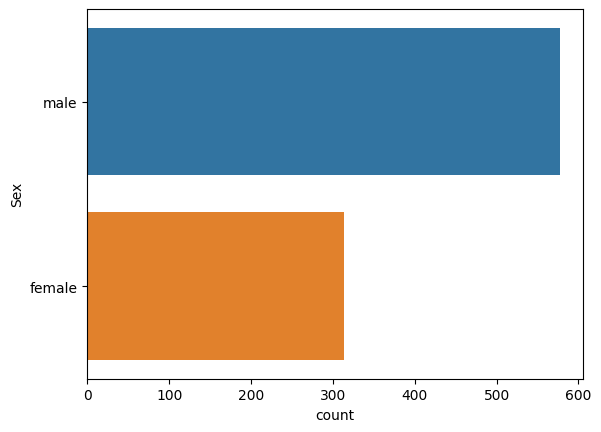

In [ ]:
# Horizontal
sns.countplot(data=df,y="Sex")

Berdasarkan output Barplot di atas diketahui bahwa jumlah penumpang laki-laki lebih banyak daripada jumlah penumpang perempuan.

### b. Mengetahui perbandingan jumlah penumpang yang survived/ not survived berdasarkan jenis kelamin

<Axes: xlabel='Sex', ylabel='Survived'>

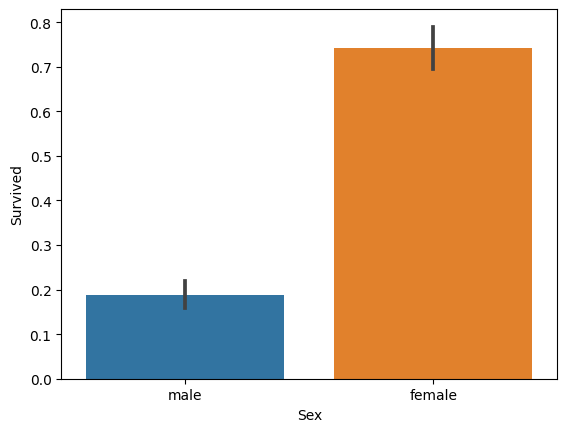

In [ ]:
sns.barplot(data=df, x='Sex', y='Survived')

Berdasarkan output Barplot di atas diketahui bahwa penumpang perempuan memiliki tingkat keselamatan yang lebih tinggi daripada penumpang laki-laki yaitu perempuanlebih dari 0,7 sementara laki-laki kurang dari 0,2.

<Axes: xlabel='Sex', ylabel='count'>

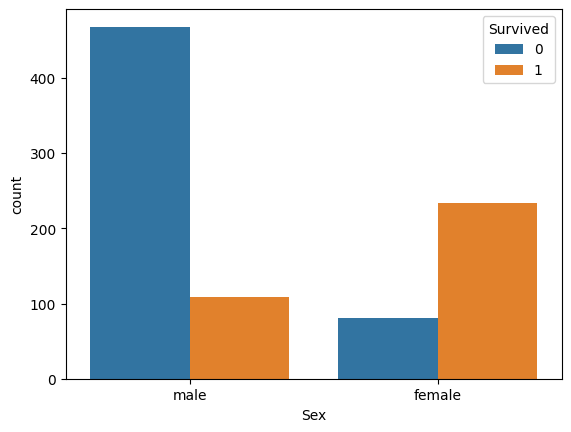

In [ ]:
# Vertikal 
sns.countplot(data=df,x='Sex', hue='Survived')

<Axes: xlabel='count', ylabel='Sex'>

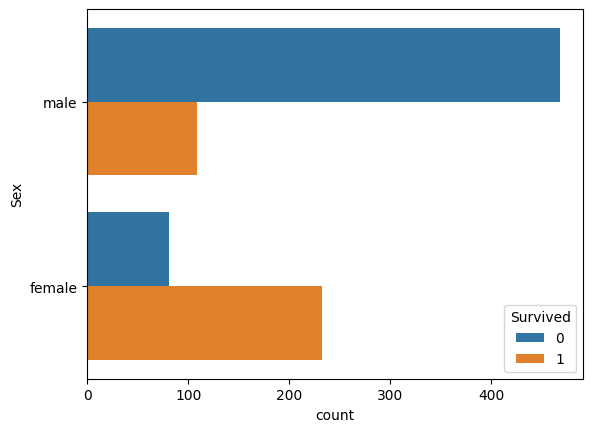

In [ ]:
# Horizontal
sns.countplot(data=df,y='Sex', hue='Survived')

Berdasarkan output Barplot diketahui bahwa
1. Mayoritas penumpang laki-laki tidak selamat
2. Mayoritas penumpang perempuan selamat
3. Jumlah penumpang selamat paling banyak berjenis kelamin perempuan

## 5.4. Variabel Embarked

### a. Mengetahui perbandingan jumlah penumpang berdasarkan asal penumpang

<Axes: xlabel='Embarked', ylabel='count'>

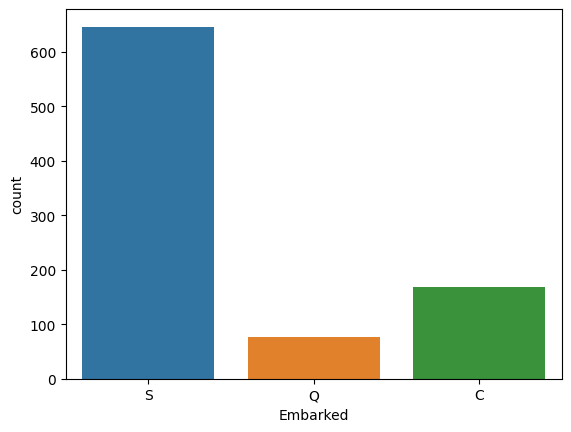

In [ ]:
# Vertikal 
sns.countplot(data=df,x="Embarked")

<Axes: xlabel='count', ylabel='Embarked'>

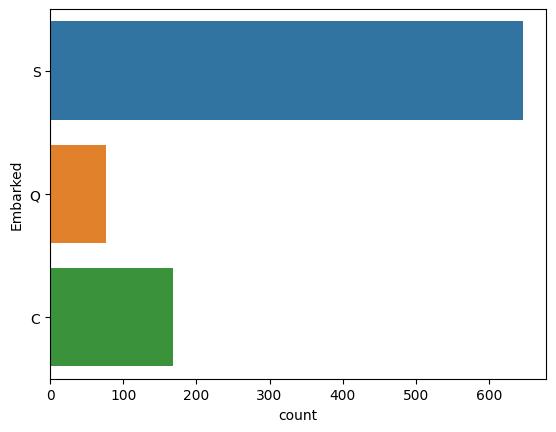

In [ ]:
# Horizontal
sns.countplot(data=df,y="Embarked")

Dengan diketahui bahwa: C=Cherbourg; S=Southampton; Q=Queenstwon

Berdasarkan output Barplot diketahui bahwa jumlah penumpang paling banyak berasal dari Southampton, sementara paling sedikit berasal dari Queenstown.

### b.  Mengetahui perbandingan jumlah penumpang yang survived/ not survived berdasarkan asal

<Axes: xlabel='Embarked', ylabel='Survived'>

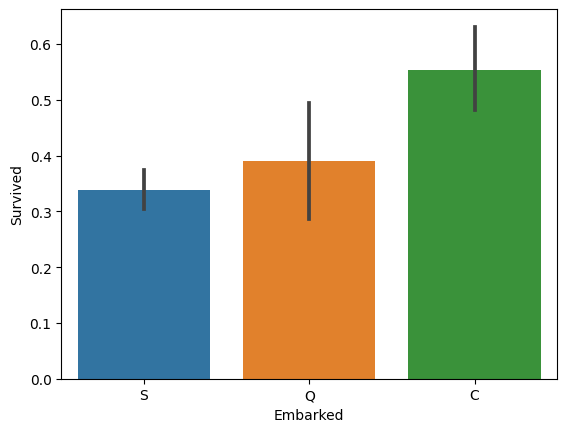

In [ ]:
sns.barplot(data=df, x='Embarked', y='Survived')

Berdasarkan output Barplot di atas diketahui bahwa penumpang asal Cherbourg memiliki tingkat keselamatan paling tinggi daripada penumpang asal Southampton atau Queenstown.

<Axes: xlabel='Embarked', ylabel='count'>

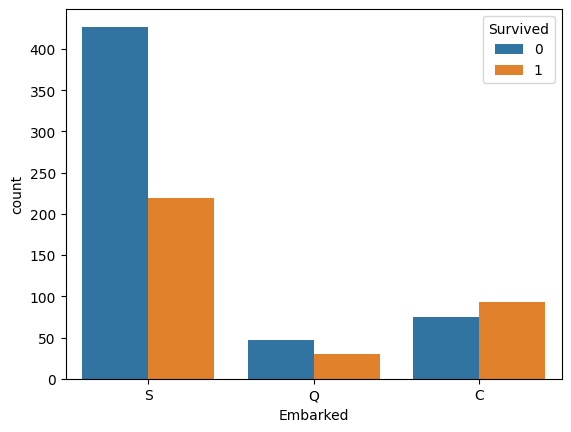

In [ ]:
# Vertikal 
sns.countplot(data=df, x='Embarked', hue='Survived')

<Axes: xlabel='count', ylabel='Embarked'>

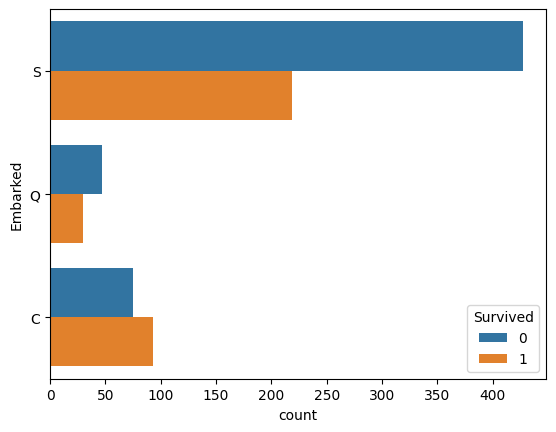

In [ ]:
# Horizontal
sns.countplot(data=df, y='Embarked', hue='Survived')

Berdasarkan output Barplot di atas diketahui bahwa 
1. Mayoritas penumpang dari Cherbourg selamat
2. Mayoritas penumpang dari Queenstown tidak selamat
3. Mayoritas penumpang dari Shouthampton tidak selamat
4. Jumlah penumpang yang selamat paling banyak berasal dari Southampton
5. Jumlah penumpang yang tidak selamat paling banyak berasal dari Southampton pula.

## 5.5. Variabel SibSp

### a. Mengetahui perbandingan jumlah penumpang berdasarkan jumlah saudara yang bersama di kapal

<Axes: xlabel='SibSp', ylabel='count'>

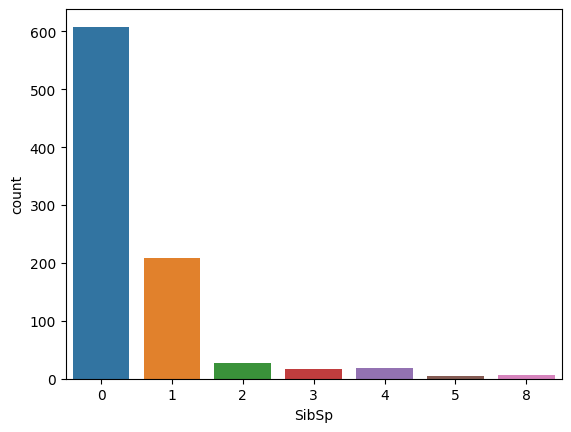

In [ ]:
# Vertikal 
sns.countplot(data=df,x="SibSp")

<Axes: xlabel='count', ylabel='SibSp'>

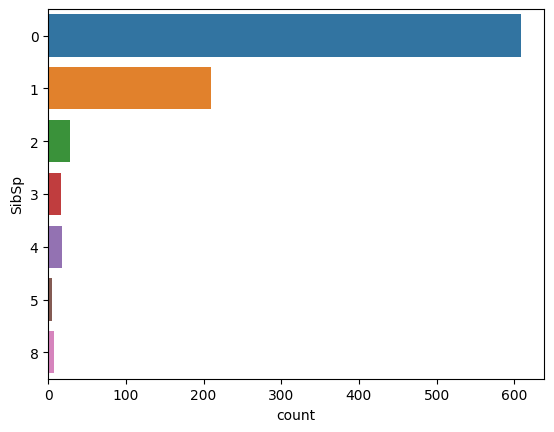

In [ ]:
# Horizontal
sns.countplot(data=df,y="SibSp")

Berdasarkan output diketahui bahwa mayoritas penumpang kapal tidak bersama saudara saat menaiki kapal. Hanya eberapa penumpang yang bersama saudara. Penumpang dengan jumlah saudara terbanyak sejumlah 8 saudara.

### b. Mengetahui perbandingan jumlah penumpang yang survived/ not survived berdasarkan jumlah saudara yang berada di kapal

<Axes: xlabel='SibSp', ylabel='Survived'>

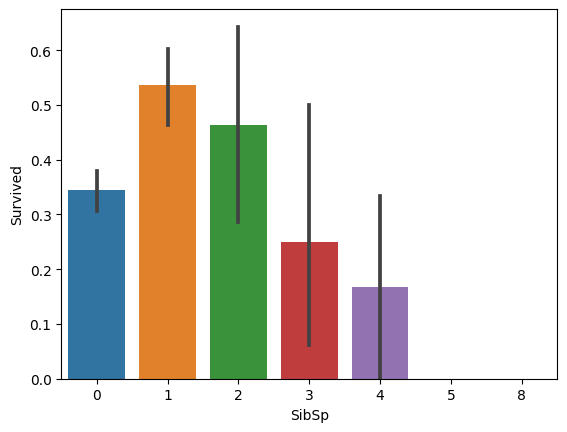

In [ ]:
sns.barplot(data=df, x='SibSp', y='Survived')

Berdasarkan output di atas diketahui bahwa penumpang yang memiliki tingkat keselamatan paling tinggi adalah penumpang yang bersama sejumlah 1 saudara. Namun, terlihat pula bahwa semakin banyak jumlah saudara yang ada semakin kecil tingkat keselamatannya.

<Axes: xlabel='SibSp', ylabel='count'>

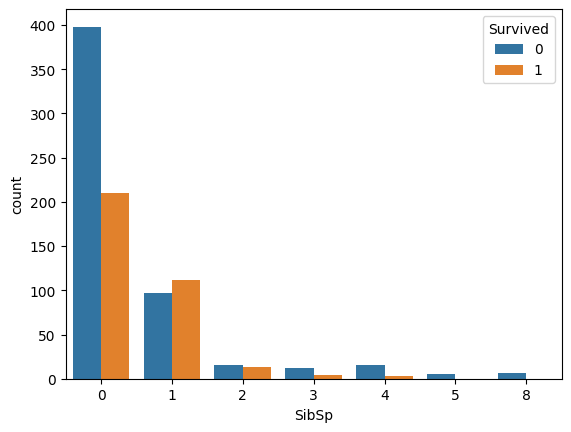

In [ ]:
# Vertikal 
sns.countplot(data=df, x='SibSp', hue='Survived')

<Axes: xlabel='count', ylabel='SibSp'>

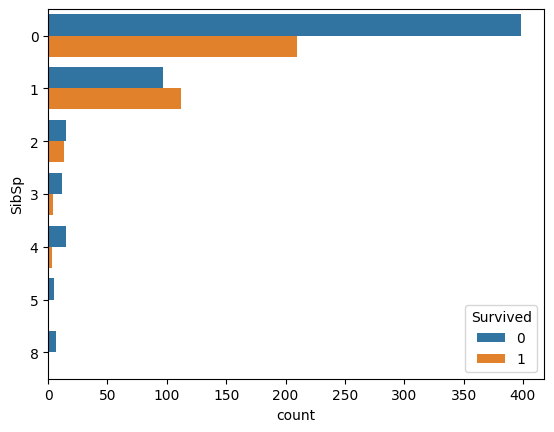

In [ ]:
# Horizontal
sns.countplot(data=df, y='SibSp', hue='Survived')

Berdasarkan output Barplot di atas diketahui bahwa
1. Mayoritas penumpang yang sendirian tidak selamat
2. Mayoritas penumpang yang bersama 1 saudara selamat
3. Mayoritas penumpang yang bersama lebih dari 1 saudara tidak selamat
4. Jumlah penumpang selamat paling banyak adalah penumpang yang sendirian

## 5.6. Variabel Parch

### a. Mengetahui perbandingan jumlah penumpang berdasarkan adanya orang tua atau jumlah anak yang bersama di dalam kapal

<Axes: xlabel='Parch', ylabel='count'>

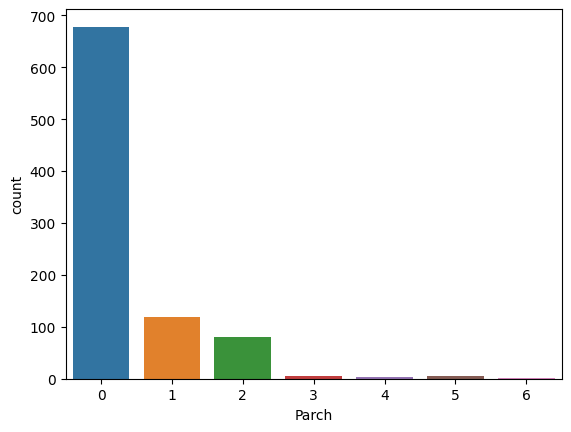

In [ ]:
# Vertikal 
sns.countplot(data=df,x="Parch")

<Axes: xlabel='count', ylabel='Parch'>

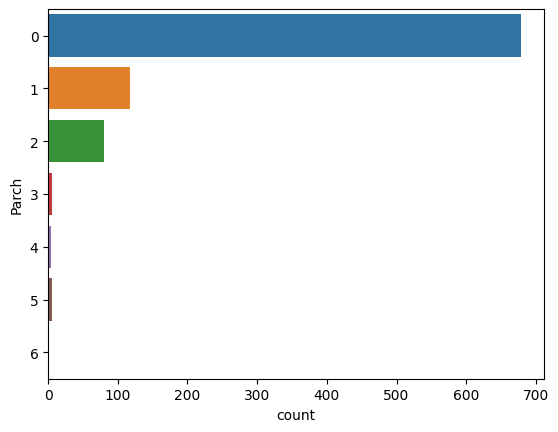

In [ ]:
# Horizontal
sns.countplot(data=df,y="Parch")

Berdasarkan output diketahui bahwa mayoritas penumpang kapal tidak bersama orang tua/anak saat menaiki kapal. Hanya beberapa penumpang yang bersama orang tua/anak. Penumpang dengan jumlah orang tua/anak terbanyak sejumlah 6 saudara.

### b. Mengetahui perbandingan jumlah penumpang yang survived/ not survived berdasarkan jumlah orang tua/anak yang bersama di kapal

<Axes: xlabel='Parch', ylabel='Survived'>

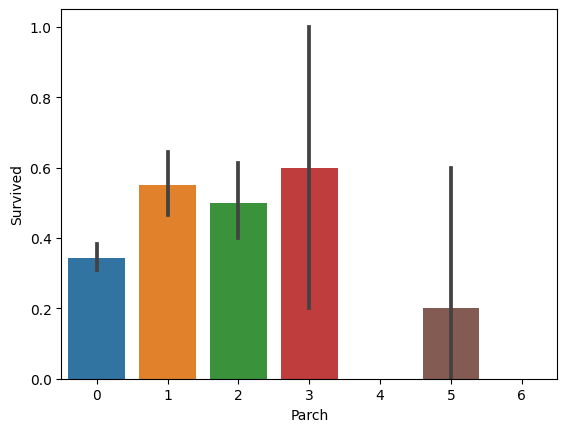

In [ ]:
sns.barplot(data=df, x='Parch', y='Survived')

Berdasarkan output di atas diketahui bahwa penumpang yang memiliki tingkat keselamatan paling tinggi adalah penumpang yang bersama sejumlah 3 anak atau orang tua. Namun, terlihat bahwa semakin banyak jumlah anak/orang tua yang bersama cenderung semakin kecil tingkat keselamatannya.

<Axes: xlabel='Parch', ylabel='count'>

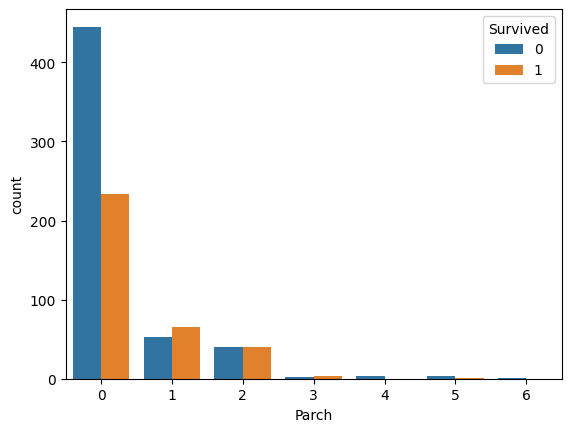

In [ ]:
# Vertikal 
sns.countplot(data=df, x='Parch', hue='Survived')

<Axes: xlabel='count', ylabel='Parch'>

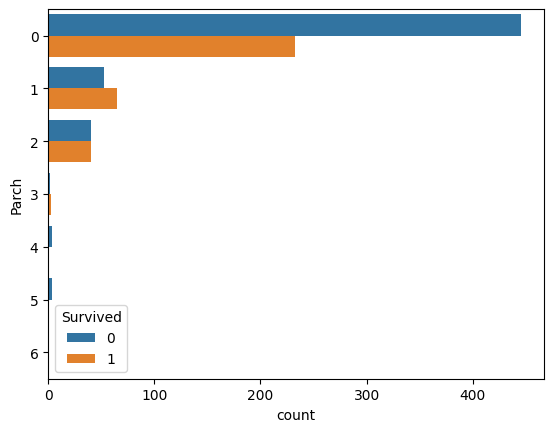

In [ ]:
# Horizontal
sns.countplot(data=df, y='Parch', hue='Survived')

Berdasarkan output Barplot di atas diketahui bahwa
1. Mayoritas penumpang yang sendirian tidak selamat
2. Mayoritas penumpang yang bersama 1 atau 3 orang tua/anak selamat
3. Mayoritas penumpang yang bersama lebih dari 3 orang tua/anak tidak selamat
4. Jumlah penumpang selamat paling banyak adalah penumpang yang sendirian

# 6. Distplot

Salah satu bentuk dari Displot adalah Histogram. Jenis visualisasi ini digunakan untuk menunjukkan sebaran, sentralisasi, kecondongan, hingga nilai ekstrem pada data. Displot dapat digunakan untuk visualisasi data numerik yang minimal memiliki skala data interval.

## 6.1. Variabel Age

**a. Distribusi Usia Penumpang**

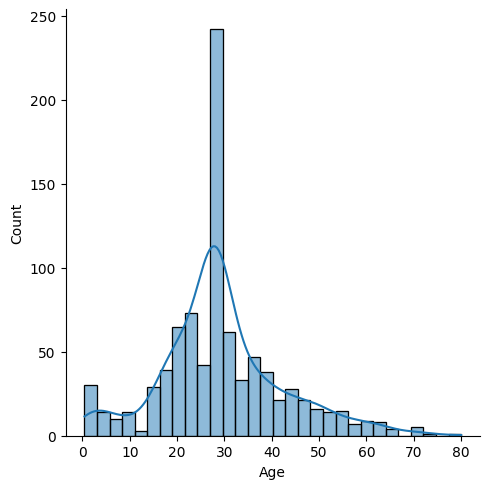

In [ ]:
sns.displot(data=df['Age'], kde=True)

Berdasarkan output di atas terlihat bahwa usia penumpang kapal tersebar mulai dari 0 hingga 80 tahun. Frekuensi tertinggi usia penumpang berada kisaran usia 20 tahun-an. Terlihat juga bahwa distribusi data tidak memiliki bentuk yang simetris sehingga dapat dikatakan bahwa data tidak bersitribusi normal. Distribusi data cenderung memiliki skewness/kemiringan kekanan (kemiringan ke arah rentang usia muda).

---
**b. Distribusi Keselamatan Penumpang Berdasarkan Usia**

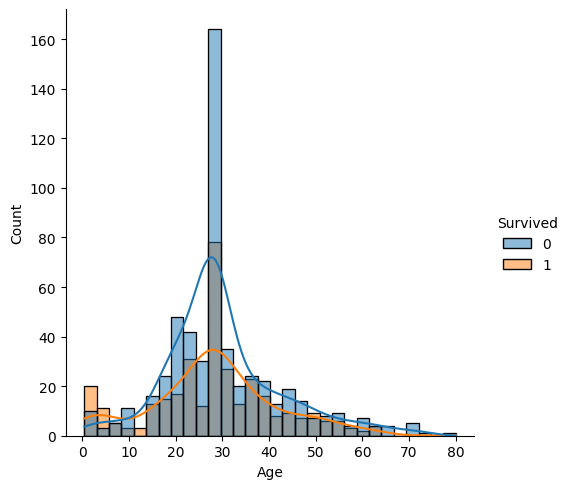

In [ ]:
sns.displot(data=df, x='Age', hue='Survived', kde=True)

Berdasarkan output di atas diketahui bahwa distribusi usia penumpang yang selamat ataupun tidak selamat beragam, tersebar dari penumpang usia 0 hingga 80 tahun. Terlihat bahwa penumpang rentang usia dini (0 - 10 tahun) memiiki tingkat keselamatan yang cukup tinggi dari tingkat kematiannya dibandingkan tingkat usia di atas nya.

## 6.2. Variabel Fare

**a. Distribusi Variabel Fare**

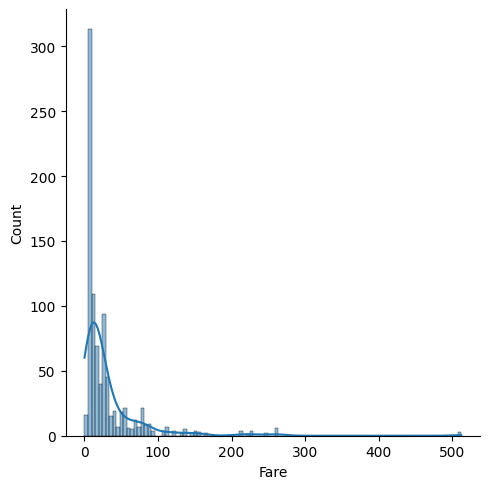

In [ ]:
sns.displot(data=df['Fare'], kde=True)

Berdasarkan output di atas diketahui bahwa penumpang memiliki tarif bayar yang beragam. Terlihat pula bahwa distribusi data tidak memiliki bentuk yang simetris atau cenderung memiliki right skewness(kemiringan kekanan) sehingga dapat dikatakan bahwa data tidak bersitribusi normal.

---
**b. Distribusi Keselamatan Berdasarkan Variabel Fare**


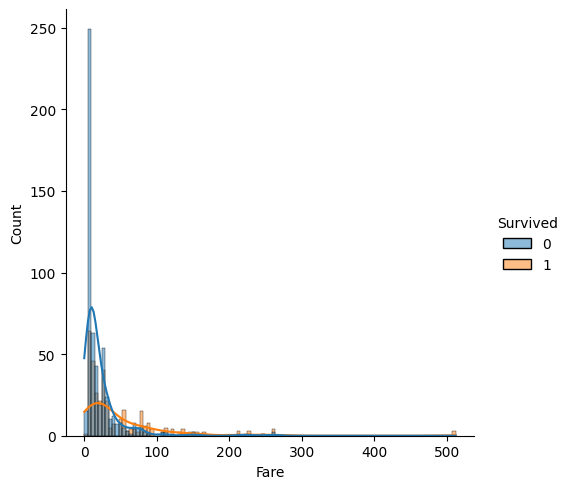

In [ ]:
sns.displot(data=df, x="Fare", hue='Survived', kde=True)

Berdasaran output di atas terlihat bahwa distribusi keselamatan penumpang tidak simetris/ terdapat kemiringan yang berarti tidak berdistribusi normal. Terlihat pula bahwa penumpang yang memiliki tarif bayar yang tinggi (di atas 50) memiliki tingkat keselamatan lebih tinggi dari tingkat kematiannya dibandingkan penumpang dengan tarif bayar yang lebih rendah.

## 6.3. Variabel SibSp

**a. Distribusi Variabel SibSp**

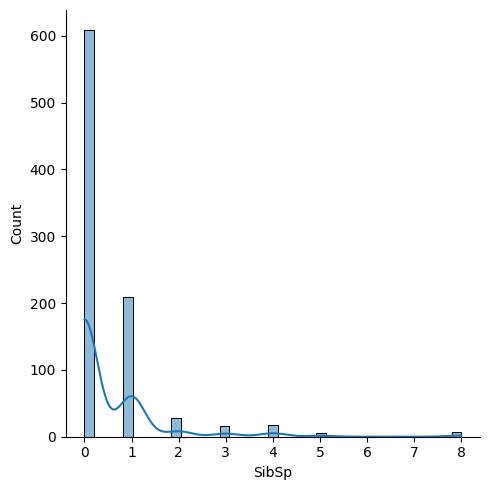

In [ ]:
sns.displot(data=df['SibSp'], kde=True)

Berdasarkan output di atas terlihat bahwa distribusi variabel SibSp memiliki kemiringan kekanan yang sangat tinggi yang berarti bahwa data tidak berdistribusi normal. Mayoritas penumpang kapal tidak bersama saudaranya.

---

**b. Distribusi Keselamatan Penumpang Berdasarkan SibSp**

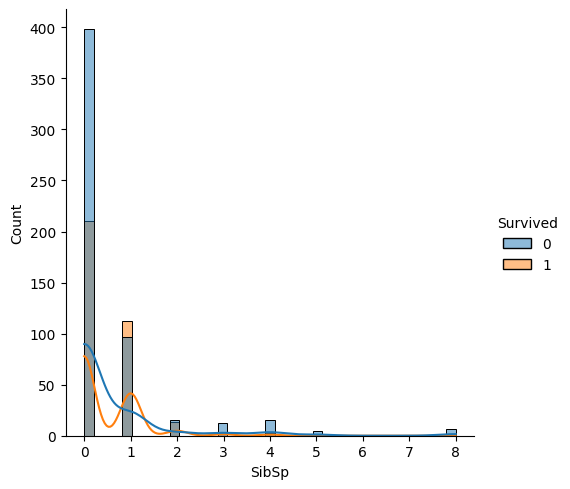

In [ ]:
sns.displot(data=df, x='SibSp', hue='Survived', kde=True)

Berdasarkan output di atas terlihat bahwa penumpang yang bersama 1 saudara memiliki tingkat keselamatan lebih tinggi dari tingat kematiannya dibandingkan penumpang yang bersama banyak saudaranya. Mayoritas penumpang selamat adalah penumpang yang sendirian.

## 6.4. Variabel Parch

**a. Distribusi Variabel Parch**

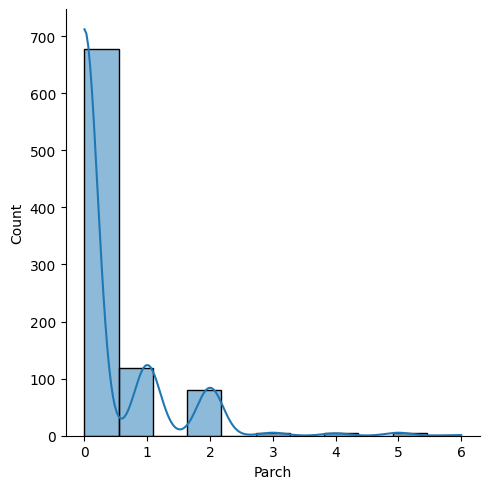

In [ ]:
sns.displot(data=df['Parch'], kde=True)

Berdasarkan output di atas terlihat bahwa data Parch tidak memiliki distribusi dengan bentuk yang simetris karena cenderung memiliki kemiringan kekanan sehingga dapat disimpulkan bahwa data tidak berdistribusi normal. Terlihat pula bahwa sebagian besar penumpang kapal tidak bersama orang tua atau anak. Hanya beberapa penumpang yang bersama orang tua atau anak.

---
**b. Distribusi Keselamatan Berdasarkan Variabel Parch**


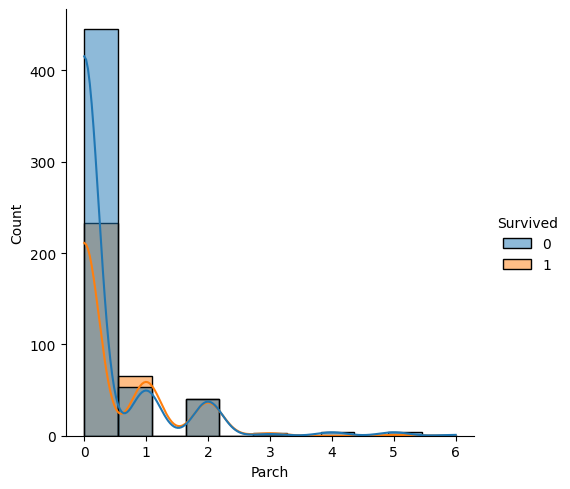

In [ ]:
sns.displot(data=df, x='Parch', hue='Survived', kde=True)

Berdasarkan output di atas terlihat bahwa penumpang yang bersama 1 anak/orang tua memiliki tingkat keselamatan lebih tinggi dari tingkat kematiannya dibandingkan penumpang yang bersama orang tua/ anak dalam jumlah banyak.
terlihat pula bahwa mayoritas penumpang selamat adalah penumpang yang sendirian.

# 7. Boxplot

Boxplot merupakan salah satu jenis dari Distribution Visualisation yang digunakan untuk menunjukkan sebaran, sentralisasi, kecondongan, hingga nilai ekstrem pada data. Boxplot dapat digunakan untuk visualisasi data numerik yang minimal memiliki skala data interval.

## 7.1. Variabel Age

**a. Distribusi Variabel Age**

<Axes: >

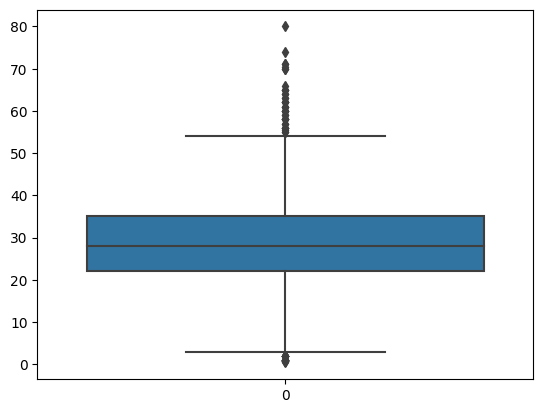

In [ ]:
sns.boxplot(data=df['Age'])

Berdasarkan output di atas terlihat bahwa frekuensi tertinggi usia penumpang berada pada kisaran usia 20 hingga 30 tahun-an. Data memiliki distribusi yang tidak normal karena memiliki kecenderungan right skewness yang ditandai dengan whisker yang lebih tinggi pada bagian atas. Terlihat juga bahwa data memiliki banyak outlier pada rentang usia tua.

---
**b. Distribusi Keselamatan Berdasarkan Usia**

<Axes: xlabel='Survived', ylabel='Age'>

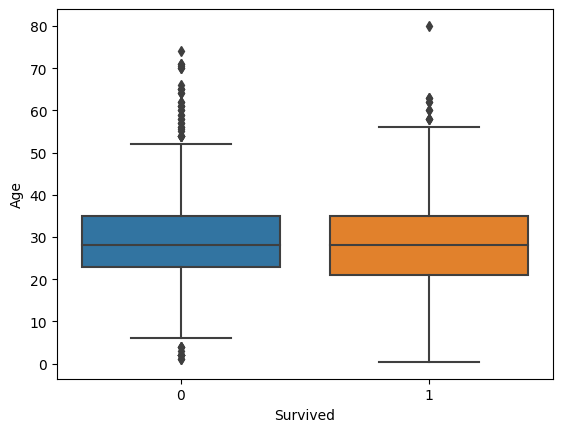

In [ ]:
sns.boxplot(data=df, x='Survived' , y='Age')

Berdasarkan output di atas terlihat bahwa distribusi penumpang yang selamat ataupun tidak selamat tersebar di berbagai usia. Namun, penumpang usia muda sedikit cenderung memiliki tingkat keselamatan yang lebih tinggi. Hal tersebut ditandai dengan output boxplot (1/Selamat) yang cenderung  memilliki kemiringan kekiri (kemiringan pada rentang usia muda) dengan nilai quartile boxplot (1/selamat) pula yang cenderung pada usia yang lebih muda. Terlihat pula pada boxplot penumpang tidak selamat memiliki right skewness yang berarti bahwa penumpang usia tua cenderung tidak selamat. Meskipun terdapat beberapa penumpang usia tua yang selamat.

## 7.2. Variabel SibSp

**a. Distribusi Variabel SibSp**

<Axes: >

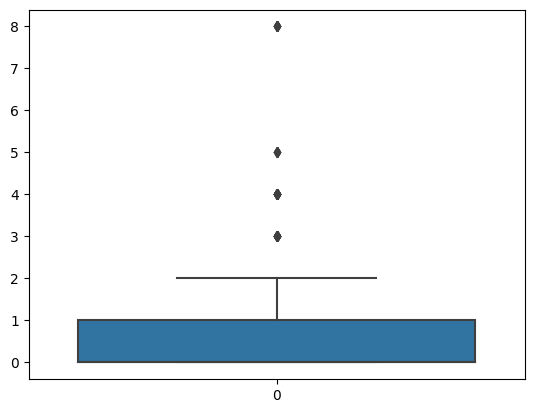

In [ ]:
sns.boxplot(data=df['SibSp'])

Berdarakan output di atas terlihat bahwa data tidak berdistribusi normal dan terdapat beberapa nilai pencilan/outlier.

---
**b. Distribusi Keselamatan Berdasarkan SibSp**


<Axes: xlabel='Survived', ylabel='SibSp'>

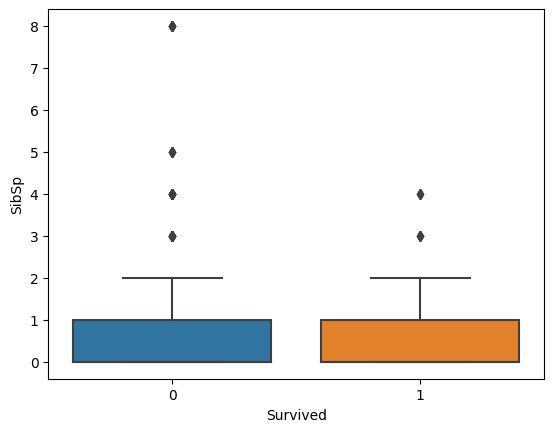

In [ ]:
sns.boxplot(data=df, x='Survived' , y='SibSp')

Berdasarkan output di atas terlihat bahwa distribusi penumpang yang selamat ataupun tidak selamat berdasarkan adanya saudara memiliki bentuk yang hampir sama. Namun, Terlihat bahwa penumpang yang bersama banyak saudaranya cenderung tidak selamat. Hal tersebut ditandai dengan adanya lebih banyak data yang menunjukkan penumpang dengan banyak saudara berada pada boxplot penumpang tidak selamat.

## 7.3. Variabel Parch

**a. Distribusi Variabel Parch**

<Axes: >

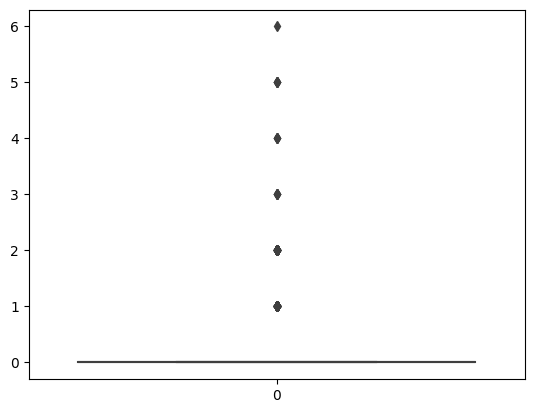

In [ ]:
sns.boxplot(data=df['Parch'])

Berdasarkan output di atas terlihat bahwa data tidak berdistribusi normal. Mayoritas penumpang menaiki kapal sendirian tanpa ditemani orang tua atau anaknya. Hanya beberapa penumpang kapal yang bersama anak/ orang tuanya.

---

**b. Distribusi Keselamatan Berdasarkan Parch**

<Axes: xlabel='Survived', ylabel='Parch'>

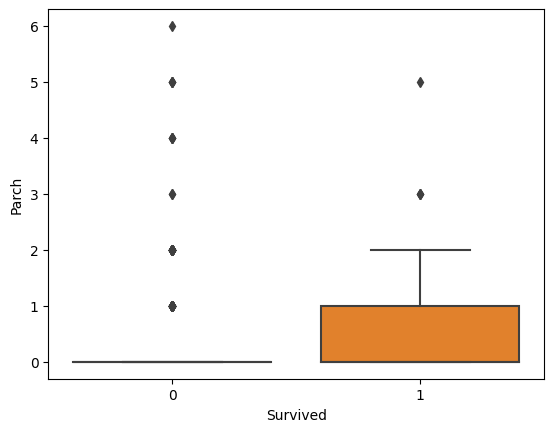

In [ ]:
sns.boxplot(data=df, x='Survived' , y='Parch')

Berdasarkan output di atas terlihat bahwa penumpang yang ditemani 1 anak/ orang tua berada pada boxplot penumpang selamat yang berarti memiliki tingkat keselamatan yang lebih tinggi dari yang lain. Namun, penumpang yang bersama orang tua/ anak dalam jumlah banyak cenderung tidak selamat.

## 7.4. Variabel Fare

**a. Distribusi Variabel Fare**

<Axes: >

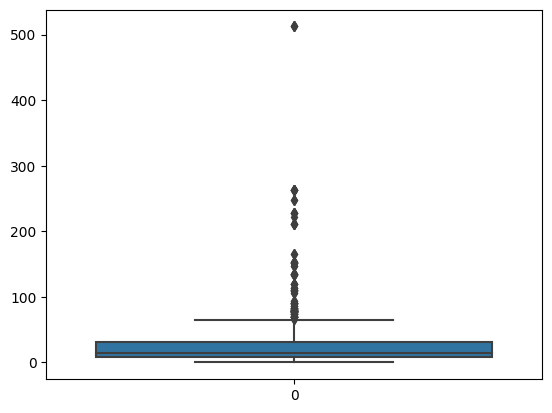

In [ ]:
sns.boxplot(data=df['Fare'])

Berdasarkan output di atas terlihat bahwa distribusi data tarif bayar cenderung memiliki Right Skewness sehingga dapat dikatakan bahwa data tidak berdistribusi normal. Data memiliki banyak nilai outlier pada tarif bayar yang lebih tinggi.

---
**b. Distribusi Keselamatan Berdasarkan Fare**

<Axes: xlabel='Survived', ylabel='Fare'>

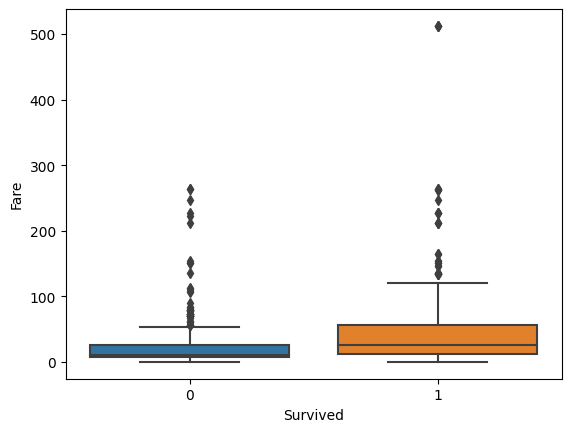

In [ ]:
sns.boxplot(data=df, x='Survived' , y='Fare')

Berdasarkan output di atas terlihat bahwa boxplot penumpang selamat ataupun tidak selamat memiliki kecenderungan right skewness. Selain itu, pada boxplot penumpang selamat banyak penumpang dengan tarif bayar di atas rata-rata yang berarti bahwa penumpang dengan tarif bayar yang lebih tinggi cenderung memilki tingkat keselamatan yang lebi tinggi dari yang lain.

# 8. Scatterplot

Scatterplot merupakan visualisasi data yang digunakan untuk mengetahui hubungan dan korelasi antar variabel data numerik minimal berskala interval. Penggunaan scatterplot untuk variabel kategorikal tidak menghasilkan banyak informasi/kesimpulan.

## 8.1. Hubungan Variabel Usia dan Tarif Bayar Terhadap Variabel Survived

<Axes: xlabel='Fare', ylabel='Age'>

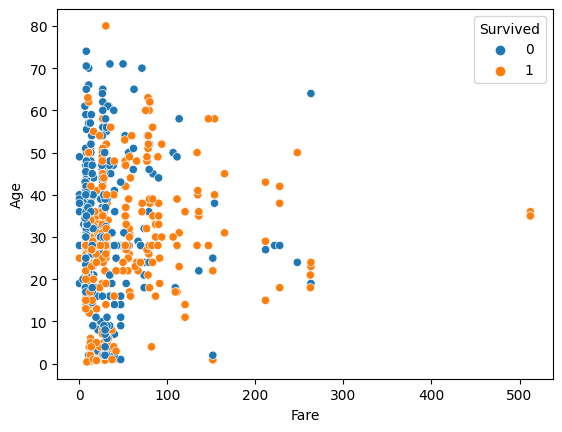

In [ ]:
sns.scatterplot(data=df,x="Fare",y="Age", hue="Survived")

Berdasaran output di atas apabila dilihat berdasarkan letak plot pada sumbu x (fare) dan y (age), plot - plot data tersebar acak/ tidak terlihat membentuk pola tertentu. Hal tersebut menunjukkan bahwa tidak ada korelasi antara variabel Age dengan Variabel Fare. Sementara, apabila dilihat dari persebaran plot berdasarkan sumbu x (fare) dan warna tingkat keselamatannya (survived) terlihat bahwa plot yang terletak pada nilai fare yang tinggi banyak yang berwarna orange yang berarti banyak penumpang dengan fare yang tinggi selamat. Selain itu, berdasarkan scatterplot tersebut terlihat terdapat outlier.

## 8.2. Hubungan Variabel Usia dan Jumlah Saudara yang bersama di dalam kapal terhadap Variabel Survived

<Axes: xlabel='SibSp', ylabel='Age'>

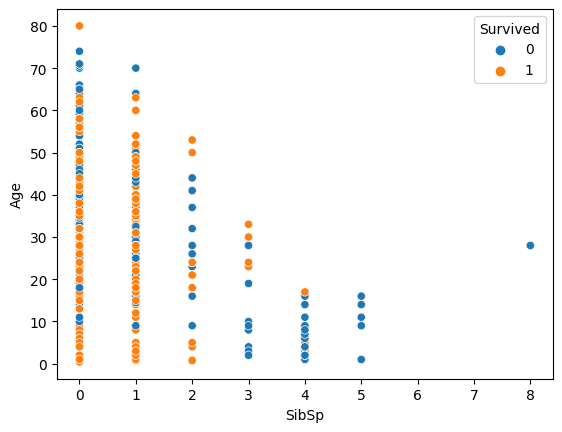

In [ ]:
sns.scatterplot(data=df,x="SibSp",y="Age", hue="Survived")

Berdasarkan output di atas dapat terlihat bahwa data tersebar dengan membentuk pola teretentu. Pola yang terlihat menunjukkan bahwa penumpang yang bersama dengan saudaranya adalah penumpang yang berusia dini. Persebaran data cenderung menunjukkan semakin dini usia penumpang maka cenderung bersama saudara di dalam kapal. Selain itu, berkaitan dengan tingat keselamatan terlihat bahwa semakin banyak jumlah saudara yang bersama di dalam kapal maka semakin rendah tingkat keselamatannya. Hal tersebut terlihat bahwa banyak plot orange berada pada nilai SibSp yang kecil sementara plot pada nilai SibSp yang lebih tinggi mayoritas berwarna biru. Terlihat pula terdapat outlier data.

## 8.3. Hubungan Variabel Usia dan Jumlah Anak/Orang tua yang bersama di dalam kapal terhadap Variabel Survived

<Axes: xlabel='Parch', ylabel='Age'>

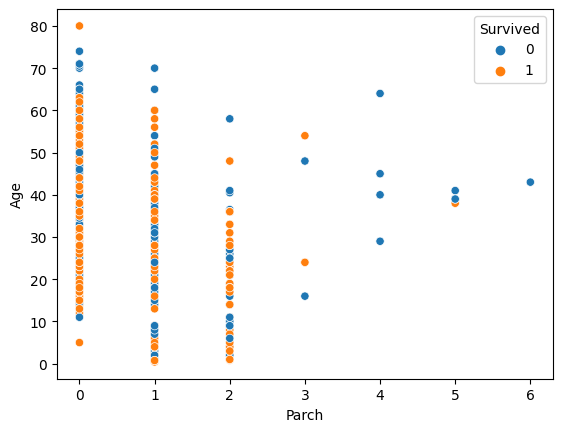

In [ ]:
sns.scatterplot(data=df,x="Parch",y="Age", hue="Survived")

Berdasarkan output di atas meskipun terlihat terdapat banyak outlier, namun data cenderung memiliki pola persebaran tertentu. Dapat terlihat bahwa semakin banyak jumlah saudara, plot berada pada tingkat usia yang semakin rendah. Hal itu menunjukkan bahwa semakin dini usia penumpang maka cenderung bersama orang tua di dalam kapal. Selain itu, berkaitan dengan tingkat keselamatan terlihat bahwa semakin banyak orang tua/ anak plot berwarna orang cenderung berkurrang yang berarti bahwa semakin banyak jumlah keluarga maka semakin kecil tingkat keselamatannya.

## 8.4. Hubungan Variabel Tarif Bayar dan Jumlah Saudara yang bersama di dalam kapal terhadap Variabel Survived

<Axes: xlabel='SibSp', ylabel='Fare'>

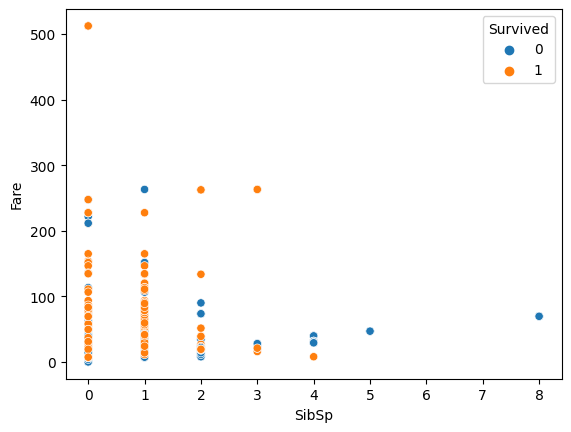

In [ ]:
sns.scatterplot(data=df,x="SibSp",y="Fare", hue="Survived")

Berdasarkan output di atas terlihat data memiliki persebaran dengan pola tertentu. Namun, berdasarkan visualisasi di atas belum dapat ditarik kesimpulan yang pasti berkaitan dengan hubungan antara variabel Fare dengan SibSp. Hal tersebut dikarenakan meskipun SibSp merupakan variabel numerik berskala interval. Namun, nilai data tidak memiliki rentang yang luas. Sehingga, jumlah plot yang ada tidak menghasilkan visualisasi data yang jelas.

Meskipun demikian, terdapat kecenderungan pola yang dapat dilihat berkaitan dengan tingkat keselamatan penumpang. Terlihat bahwa penumpang dengan tarif bayar yang rendah ditambah dengan adanya banyak saudara di kapal memiliki tingkat keselamatan yang rendah yang ditandai dengan pola persebaran plot biru yang cenderung meningkat di tingkat Fare yang rendah dan jumlah SibSp yang tinggi. Serta, terlihat bahwa penumpang dengan tarif bayar yang tinggi ditambah dengan tidak banyaknya saudara di kapal memiliki tingkat keselamatan yang tinggi yang ditandai dengan pola persebaran plot orange yang cenderung meningkat di tingkat Fare yang tinggi dan jumlah SibSp yang rendah.

## 8.5. Hubungan Variabel Tarif Bayar dan Jumlah anak/ orang tua yang bersama di dalam kapal terhadap Variabel Survived

<Axes: xlabel='Parch', ylabel='Fare'>

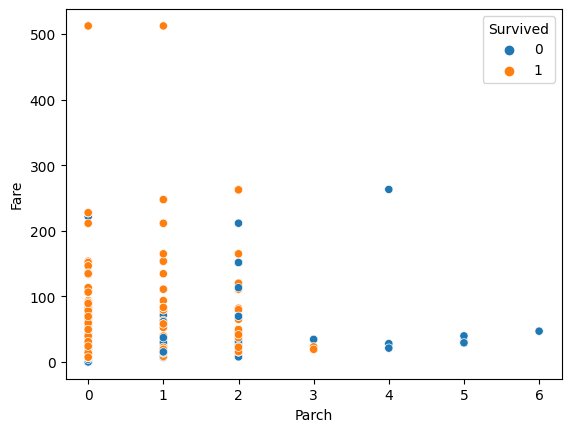

In [ ]:
sns.scatterplot(data=df,x="Parch",y="Fare", hue="Survived")

Berdasarkan output di atas terlihat data memiliki persebaran dengan pola tertentu. Namun, berdasarkan visualisasi di atas belum dapat ditarik kesimpulan yang pasti berkaitan dengan hubungan antara variabel Fare dengan Parch. Hal tersebut dikarenakan meskipun Parch merupakan variabel numerik berskala interval. Namun, nilai data tidak memiliki rentang yang luas. Sehingga, jumlah plot yang ada tidak menghasilkan visualisasi data yang jelas.

Meskipun demikian, terdapat kecenderungan pola yang dapat dilihat berkaitan dengan tingkat keselamatan penumpang. Terlihat bahwa penumpang dengan tarif bayar yang rendah ditambah dengan adanya banyak anak/orang tua di kapal memiliki tingkat keselamatan yang rendah yang ditandai dengan pola persebaran plot biru yang cenderung meningkat di tingkat Fare yang rendah dan jumlah Parch yang tinggi. Serta, terlihat bahwa penumpang dengan tarif bayar yang tinggi ditambah dengan tidak banyaknya anak/ tidak adanya orang tua di kapal memiliki tingkat keselamatan yang tinggi yang ditandai dengan pola persebaran plot orange yang cenderung meningkat di tingkat Fare yang tinggi dan jumlah Parch yang rendah.

## 8.6. Hubungan Variabel Jumlah Saudara dan Jumlah anak/ orang tua yang bersama di dalam kapal terhadap Variabel Survived

<Axes: xlabel='Parch', ylabel='SibSp'>

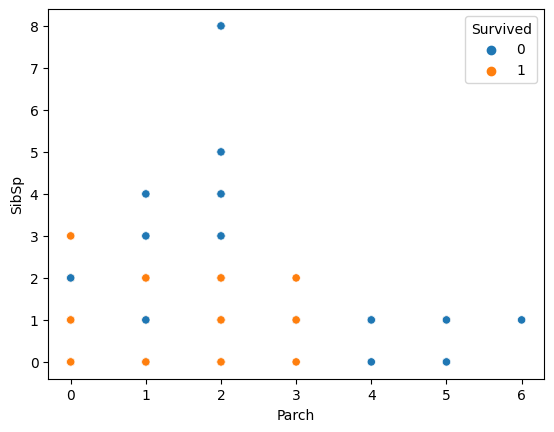

In [ ]:
sns.scatterplot(data=df,x="Parch",y="SibSp", hue="Survived")

Berdasarkan output di atas terlihat data memiliki persebaran dengan pola tertentu. Terdapat kecenderungan pola yang dapat dilihat berkaitan dengan tingkat keselamatan penumpang. Terlihat bahwa penumpang dengan jumlah SibSp yang tinggi atau jumlah Parch yang tinggi cenderung tidak selamat.

# 9. Pie chart

Pie Chart merupakan visualisasi data yang digunakan untuk menunjukkan komposisi dari satu atau lebih variabel baik dalam persentase atau bilangan mutlak.

## a. Pie Chart setiap Variabel: Survived, Pclass, Sex, dan Embarked

Text(0.5, 1.0, 'Embarked Pie Chart')

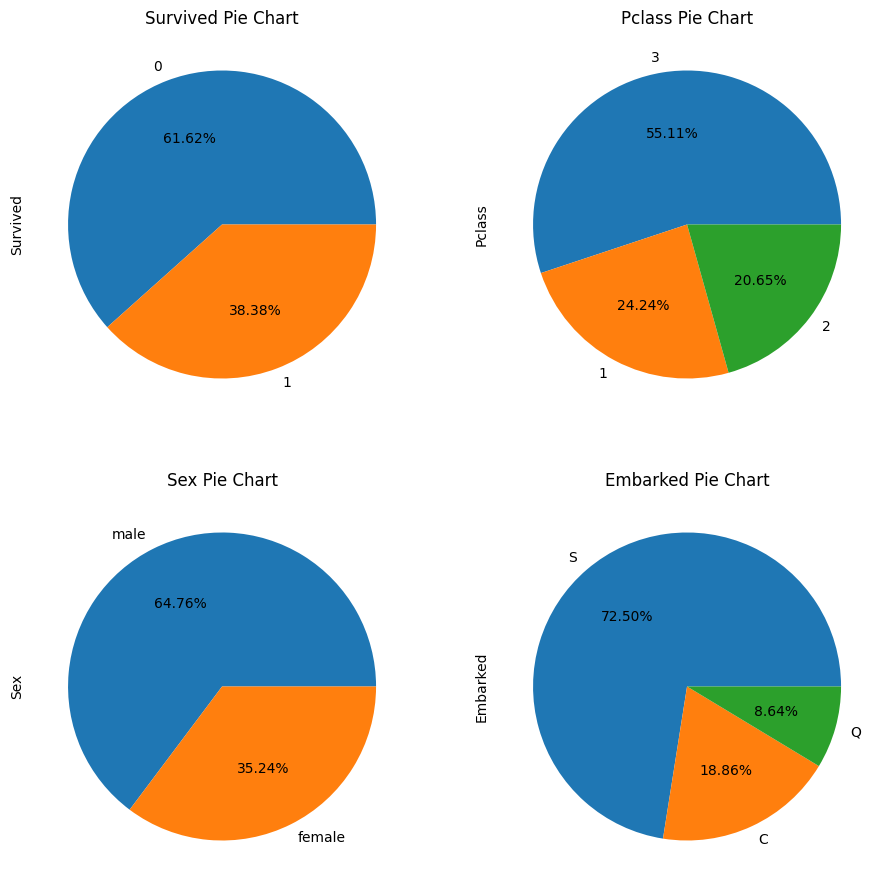

In [ ]:
f,ax = plt.subplots(2,2,figsize=(11,11))

g = df['Survived'].value_counts().plot.pie(autopct = '%1.2f%%', ax=ax[0,0])
ax[0,0].set_title('Survived Pie Chart')

g = df['Pclass'].value_counts().plot.pie(autopct = '%1.2f%%', ax=ax[0,1])
ax[0,1].set_title('Pclass Pie Chart')

g = df['Sex'].value_counts().plot.pie(autopct = '%1.2f%%', ax=ax[1,0])
ax[1,0].set_title('Sex Pie Chart')

g = df['Embarked'].value_counts().plot.pie(autopct = '%1.2f%%', ax=ax[1,1])
ax[1,1].set_title('Embarked Pie Chart')

Berdasarkan output pie chart di atas, terlihat besarnya persentase dari komposisi tiap variabel. Diketahui bahwa
1. Pada Variabel Survived, menunjukkan bahwa mayoritas yaitu sebesar 61,62% penumpang tidak selamat.
2. Pada Variabel Pclass, menunjukkan bahwa mayoritas yaitu sebesar 55,11% penumpang merupakan golongan tiket kelas 3.
3. Pada Variabel Sex, menunjukkan bahwa mayoritas yaitu sebesar 64,76% penumpang kapal adalah laki-laki.
4. Pada Variabel Embarked, menunjukkan bahwa mayoritas yaitu sebesar 72,50% penumpang berasal dari Southampton.


---



## b. Pie Chart Variabel Combination

Merupakan pie chart yang menunjukkan komposisi detail dari seluruh kategori nilai data pada semua variabel yang dicantumkan

In [ ]:
import plotly.express as px

In [ ]:
fig = px.sunburst(df, path=['Survived','Sex','Embarked','Pclass'], title='Passanger Survived Composition', color='Pclass', width=700)
fig.show()

Berdasarkan output di atas, pie chart menunjukkan komposisi semua kategori nilai data mulai dari pie chart paling dalam ke luar yaitu variabel survived variabel sex, variabel Embarked, dan variabel terluar adalah Pclass. Setiap bagian kategori dari pie chart dapat menunjukkan jumlah penumpang yang termasuk kedalam bagain kategori tersebut. Sebagai contoh jumlah penumpang yang tidak selamat berjenis kelamin laki-laki yang berasal dari southampton dan berada pada golongan tiket kelas 3 berjumlah 231 penumpang.

Berdasarkan keempat komponon variabel tersebut dapat diketahui secara bersamaan bahwa 
1. Penumpang yang tidak selamat lebih banyak daripada penumpang yang selamat dengan jumlah tidak selamat sebanyak 549 penumpang dan jumlah selamat 342 penumpang.
3. Mayoritas penumpang kapal yang tidak selamat adalah penumpang laki-laki yang berasal dari Southampton yang berada pada golongan tiket kelas 3 dengan jumlah sebanyak 231 penumpang.
4. Mayoritas penumpang yang selamat adalah penumpang perempaun yang berasal dari southampton yang berada pada golongan tiket kelas 2 dengan jumlah sebanyak 61 penumpang.

# 10. Kesimpulan



Berdasarkan visualisasi yang telah dilakukan dapat disimpulkan bahwa:

1. Mayoritas penumpang tidak selamat
2. Berdasarkan Gender, tingkat keselamatan penumpang perempuan lebih tinggi daripada laki-laki
3. Berdasarkan Golongan Tiket, tingkat keselamatan penumpang paling tinggi adalah penumpang kelas 1 (upper)
4. Berdasarkan Usia, tingkat keselamatan penumpang usia muda lebih tinggi dari usia di atasnya
5. Berdasarkan Adanya Saudara/Anggota Keluarga di dalam kapal, tingkat keselamatan penumpang yang sendiri atau bersama sedikit saudara lebih tinggi dari penumpang yang bersama banyak saudara/anggota keluarga.
6. Berdasarkan Tarif Bayar, tingkat keselamatan penumpang dengan tarif bayar yang besar lebih tinggi dari tarif bayar di bawahnya
7. Berdasarkan Asal, tingkat keselamatan penumpang  dari Cherbourg paling tinggi diantara 2 daerah lain, namun mayoritas penumpang yang selamat berasal  dari Southampton. Hal tersebut karena jumlah penumpang dari Southampton yang memang sangat banyak.
8. Jumlah penumpang selamat adalah 342 dengan berdasarkan kategori sebagai berikut:
    - female,southampton,kelas 2 = 61
    - female,southampton,kelas 1 = 48
    - female,southampton,kelas 3 = 33
    - female,Cherbourg,kelas 1 = 42
    - female,Cherbourg,kelas 3 = 15
    - female,Cherbourg,kelas 2 = 7
    - male,southampton,kelas 3 = 34
    - male,southampton,kelas 1 = 28
    - male,southampton,kelas 2 = 15
    - male,Cherbourg,kelas 1 = 17
    - male,Cherbourg,kelas 3 = 10
    - male,Cherbourg,kelas 2 = 2
    - male,Queenstown,kelas 3 = 3
9. Jumlah penumpang tidak selamat adalah 549 dengan berdasarkan kategori sebagai berikut:
    - male,southampton,kelas 3 = 231
    - male,southampton,kelas 2 = 82
    - male,southampton,kelas 1 = 51
    - male,Cherbourg,kelas 3 = 33
    - male,Cherbourg,kelas 1 = 25
    - male,Cherbourg,kelas 2 = 8
    - male,Queenstown,kelas 3 = 36
    - male,Queenstown,kelas 1 = 1
    - male,Queenstown,kelas 2 = 1
    - female,southampton,kelas 3 = 55
    - female,southampton,kelas 2 = 6
    - female,southampton,kelas 1 = 2
    - female,Cherbourg,kelas 3 = 8
    - female,Cherbourg,kelas 1 = 1
    - female,Queenstown,kelas 3 = 9